In [20]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
from scipy.special import jn_zeros
import sys
from mpl_toolkits import mplot3d
PlotParams(fontsize=10)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T


def FloatToStringSave(a):
    return str(a).replace(".", "p")

In [105]:
# dfO = pd.read_csv("D:Data/Set21-alpha=1,beta=2,omega=8,local/"+"data_3.csv",
#                            index_col=False)
# df_dir = Path().absolute().parent.parent/"paper_data"/"data_3.csv"
# df_dir = Path().absolute().parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0.csv"
df_dir = Path().absolute().parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0,newvals.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex})
# dfO = pd.read_csv("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/FT-Min,phi3=0.csv",
#                   index_col=False)
# dfP0 = pd.read_csv("D:/Data/Set12-alpha=1,beta=2,omega=8/Summaries/FT-ABS-phi3=0.csv", 
#                     index_col = False)
dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)


A2_min = 0
A2_max = 18.5
A2_range = int((A2_max - A2_min)*100 +1)
A3_min = 37
A3_max = 38.5
A3_range = int((A3_max - A3_min)*100 +1)
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]

dfP = dfP.sort_values(by=['A3', 'A2'], ignore_index=True)

#%%
"""plot raw hopping"""
A2 = np.array(dfP.A2.to_list())
A3 = np.array(dfP.A3.to_list())
J12 = np.abs(np.array(dfP["FT-J12"].to_list()))
J23 = np.abs(np.array(dfP["FT-J23"].to_list()))
J31 = np.abs(np.array(dfP["FT-J31"].to_list()))
J23oJ12 = J23 / J12
J31oJ12 = J31 / J12




In [111]:

"""plot just with J12, J23, J31"""


# dfP = dfO
n_section_x = A3_range#401#16; 
n_section_y = A2_range#301#186
A2_square = np.resize(A2, (n_section_x, n_section_y))
A3_square = np.resize(A3, (n_section_x, n_section_y))
X = np.resize(J23oJ12, (n_section_x, n_section_y))
Y = np.resize(J31oJ12, (n_section_x, n_section_y))

X = np.where(X<=1, X, np.nan)
Y =np.where(X<=1, Y, np.nan)
# A2_square = np.where(X<=1, A2_square, np.nan)
# A3_square = np.where(X<=1, A3_square, np.nan)

X = np.where(X>=Y, X, np.nan)
Y = np.where(X>=Y, Y, np.nan)
# A2_square = np.where(X>=Y, A2_square, np.nan)
# A3_square = np.where(X>=Y, A3_square, np.nan)





/tmp/ipykernel_6359/2103196402.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.draw()


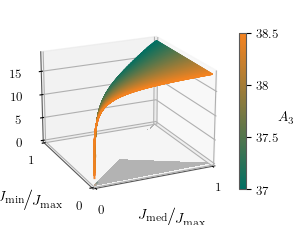

In [112]:

# create colormap according to x-value (can use any 50x50 array)
color_dimension = A3_square # change to desired fourth dimension
z_dimension = A2_square
fontsize=10
PlotParams(fontsize=fontsize)
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)




figsize=(8,8)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.view_init(20,245)
# ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,z_dimension, 
                facecolors=fcolors,
                vmin=minn, vmax=maxx,
                rstride=1, cstride=1,  alpha=0.8, 
                shade=False,
                        linewidth=1,
                        antialiased=True
                        )
cset = ax.contourf(X, Y, z_dimension, zdir='z', offset=np.min(z_dimension),colors="0.7")

ax.zaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=fontsize*1.5)
ax.set_zlabel('', labelpad = 1, rotation=0)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)
ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])
ax.set_zticks([0,5,10,15])

ax.set_xlim((0,1))
ax.set_ylim((0,1))
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size='5%', pad=0.6)
# cax = divider.append_axes('right', size=f"5%", pad=0.01)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)# label="unweighted graph distance")
# fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, shrink =0.55,  pad=0.05, ticks=[37, 37.5, 38, 38.5])
cbar.ax.set_yticklabels([r"$37$", r"$37.5$", r"$38$", r"$38.5$"])

# divider = make_axes_locatable(ax)

# cax = divider.append_axes('right', size=f"10%", pad=0.05)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar = plt.colorbar(m)
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=5)

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.canvas.draw() 
# plt.tight_layout()
# plt.subplots_adjust(left=0,bottom=0,right=3,top=1)
fig.tight_layout()
# plt.subplots_adjust(left=-10, right=0.9, top=0.9, bottom=0.1)
# ax = fig.add_axes([0.05, 0.05, 0.9, 0.9 ])
# fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"3d_tunnelling_cover_alpha=2beta_noyaxis.pdf", format="pdf", bbox_inches="tight")
# fig.savefig(Path().absolute().parent.parent/"figures"/"cpgm_pres"/"3d_tunnelling_cover_alpha=2beta_noyaxis.png", format="png", bbox_inches="tight")
plt.show()


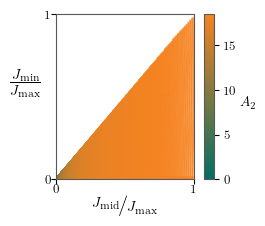

In [123]:
A2_flat = np.array(dfP.A2.to_list())
A3_flat = np.array(dfP.A3.to_list())

X_flat =J23oJ12
Y_flat = J31oJ12

fontsize=10
PlotParams(fontsize=fontsize)



# remove off diagonal parts
X_flat = np.where(X_flat>Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

colour_flat = A2_flat

minn, maxx = colour_flat.min(), colour_flat.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
# m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# m.set_array([])
# fcolors = m.to_rgba(color_dimension)

figsize=(7,6)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.2, alpha=1, norm=norm, cmap=cmap)

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=8)
fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"2d_tunnelling_cover_2alpha=beta_A2.pdf", format="pdf", bbox_inches="tight")
plt.show()


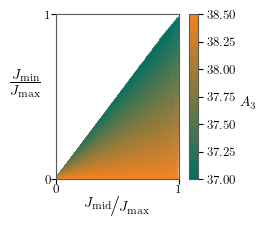

In [122]:
A2_flat = np.array(dfP.A2.to_list())
A3_flat = np.array(dfP.A3.to_list())

X_flat =J23oJ12
Y_flat = J31oJ12

fontsize=10
PlotParams(fontsize=fontsize)



# remove off diagonal parts
X_flat = np.where(X_flat>=Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>=Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

colour_flat = A3_flat

minn, maxx = colour_flat.min(), colour_flat.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
# m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# m.set_array([])
# fcolors = m.to_rgba(color_dimension)

figsize=(7,6)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.3, alpha=1, norm=norm, cmap=cmap)

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)
fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"2d_tunnelling_cover_2alpha=beta_A3.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [5]:
print(np.nanmax(z_dimension))
from scipy.special import jn_zeros


18.5


In [ ]:
 # first term expansion term
omega0 = 8
omega
        J23_real = -(1/T)*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
        J23_imag = -1j*(1/T)*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
        # we are removing esimate of absolute error
        J23 = J23_real + J23_imag

        # J23 = -jv(0, (A3-A2)/omega0)
